[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Logistic Regression Accuracy: 0.9222587204755202
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5937
           1       0.47      0.79      0.59       456

    accuracy                           0.92      6393
   macro avg       0.73      0.86      0.77      6393
weighted avg       0.95      0.92      0.93      6393

Logistic Regression Confusion Matrix:
[[5536  401]
 [  96  360]]

Random Forest Accuracy: 0.9527608321601752
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5937
           1       0.68      0.63      0.66       456

    accuracy                           0.95      6393
   macro avg       0.83      0.80      0.82      6393
weighted avg       0.95      0.95      0.95      6393

Random Forest Confusion Matrix:
[[5803  134]
 [ 168  288]]


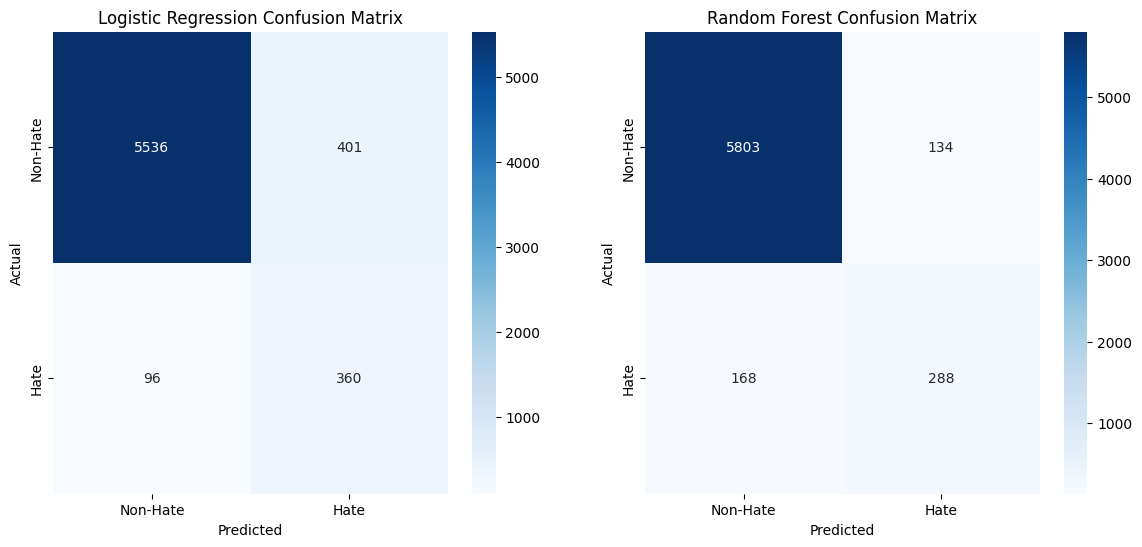

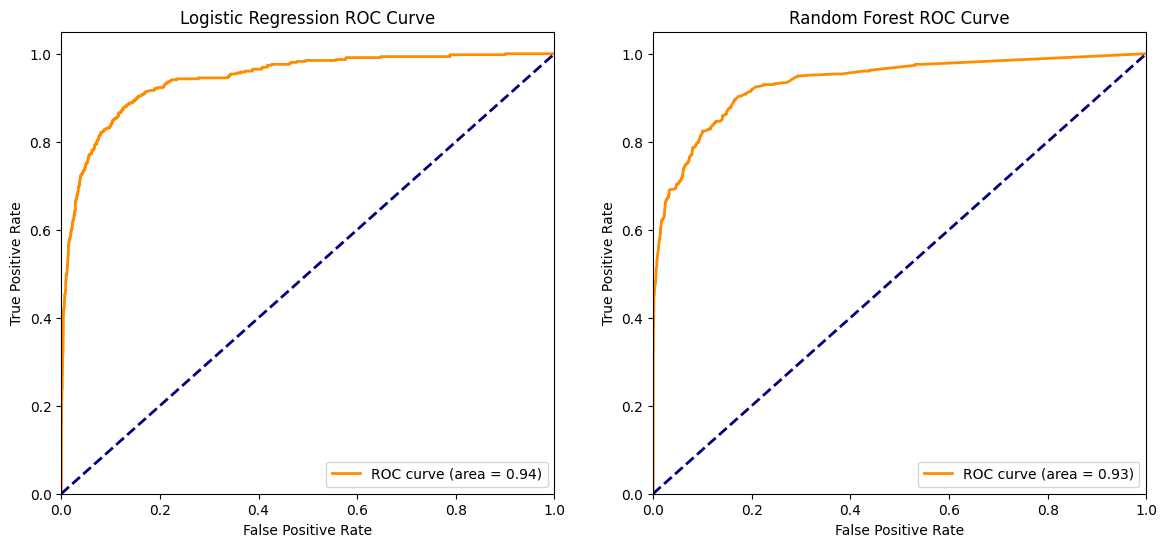

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_imb_pipeline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources (stopwords and punkt tokenizer) if not already downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv("train.csv")

# Data preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove '@user' mentions
    text = re.sub(r'@user', '', text)
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

data['cleaned_tweet'] = data['tweet'].apply(preprocess_text)

# Splitting the data into features (X) and target variable (y)
X = data['cleaned_tweet']
y = data['label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines with oversampling, TF-IDF vectorization, and two different models
logistic_pipeline = make_imb_pipeline(TfidfVectorizer(max_features=5000), RandomOverSampler(), LogisticRegression())
random_forest_pipeline = make_imb_pipeline(TfidfVectorizer(max_features=5000), RandomOverSampler(), RandomForestClassifier())

# Model training and evaluation for Logistic Regression
logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

# Model training and evaluation for Random Forest
random_forest_pipeline.fit(X_train, y_train)
y_pred_rf = random_forest_pipeline.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Logistic Regression Confusion Matrix')

# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Random Forest Confusion Matrix')

plt.show()

# Plot ROC curve
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Logistic Regression ROC Curve')
axes[0].legend(loc="lower right")

# Random Forest ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Random Forest ROC Curve')
axes[1].legend(loc="lower right")

plt.show()